<a href="https://colab.research.google.com/github/emanuel379/Metodos-Nao-Parametricos/blob/main/C%C3%B3pia_de_Trab_1_1_N%C3%A3o_Param%C3%A9tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ada Maris Pereira Mário - 12725432

Emanuel Victor da Silva Favorato - 12558151

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import binom_test
import numpy as np
from scipy.stats import kstest, expon
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm, binom, chisquare

In [ ]:
df = pd.read_csv('student_data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
# Verificando a existência de componentes NaN
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
# Observando a presença de duplicações
df.duplicated().sum()

0

In [ ]:
# Observando outra característica bastante utilizada quando não há dados
df.applymap(lambda x: x == '?').sum()

<ipython-input-6-abd9e385573b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x == '?').sum()


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
# Definindo nossa variável target, queremos saber se o estudante foi aprovado ou não no teste de matemática

df['pass'] = df.apply(lambda row:1 if(row['G1']+row['G2']+row['G3'])>= 35 else 0,axis=1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,0


In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.420253
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.494225
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [ ]:
# Tamanho da amostra
n = len(df)
n

395

A seguir serão abordados interesses acerca dos resultados fornecidos pelas variáveis

**pass:** indica se os estudantes obtiveram êxito nos exames de matemática, onde 1 simboliza sucesso e zero fracasso, sendo que o sucesso ocorre quando a soma do número de pontos obtidos nos três exames é maior ou igual a 35.

**age:** corresponde a idade dos estudantes da escola secundária sujeitos aos testes de proficiência na área matemática.

# **Teste Binomial**

(array([229.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

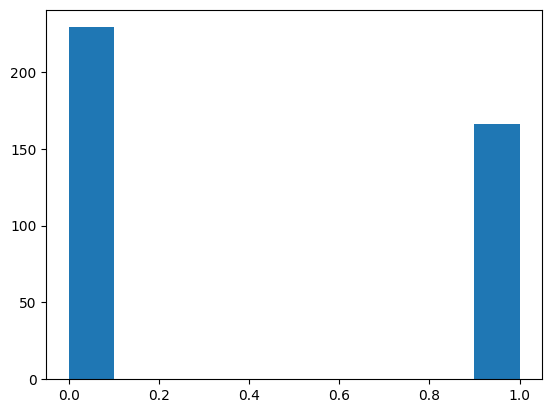

In [ ]:
plt.hist(df['pass'])

Com base na análise dos dados, queremos analisar se pelo menos a metade dos alunos que realizaram os três testes de matemática foram aprovados, ou seja:

H0: p => 0.5  vs  H1: p < 0.5

Considerando um nível de significância de α = 5%, temos:

In [ ]:
# Estatística de teste
t = len(df[df['pass'] == 1])
t

166

Como n > 20, vamos utilizar a aproximação para grandes amostras.

Sendo o teste unilateral à esquerda, vamos somar 0.5 aos dados observados, logo teremos:

In [ ]:
# Aplicando o fator de correção
t_corrigido = t + 0.5

# Realizando o teste equivalente ao binomial para grandes amostras
stat_corrected, p_valor = proportions_ztest(t_corrigido, n, 0.5, alternative='smaller')

# Print the corrected results
print(f"Estatística de teste corrigida: {stat_corrected}, valor-p: {p_valor}")

Estatística de teste corrigida: -3.15871192888353, valor-p: 0.000792340221802333


**Observação:** em R os valores são mais precisos, uma vez que em python não existe uma função que aplique tal correção, para o R, obtivemos os resultados:

 prop.test(166, 395, 0.5, alternative = 'less', correct = T)

	1-sample proportions test with continuity correction

data:  166 out of 395, null probability 0.5

X-squared = 9.7316, df = 1, p-value = 0.0009056

alternative hypothesis: true p is less than 0.5

95 percent confidence interval:

 0.000000 0.462785

sample estimates:

        p

0.4202532

Como o valor-p < α, tomamos a decisão de rejeitar H0.

**Conclusão:** ao nível de significância α = 5%, a análise dos dados coletados nos fornece evidências de que a proporção de alunos aprovados nos exames de matemática é inferior a 0.5, ou seja, que menos da metade dos estudantes obtiveram êxito nos testes.

# **Teste do quantil**

(array([ 82., 104.,  98.,  82.,  24.,   3.,   2.]),
 array([15., 16., 17., 18., 19., 20., 21., 22.]),
 <BarContainer object of 7 artists>)

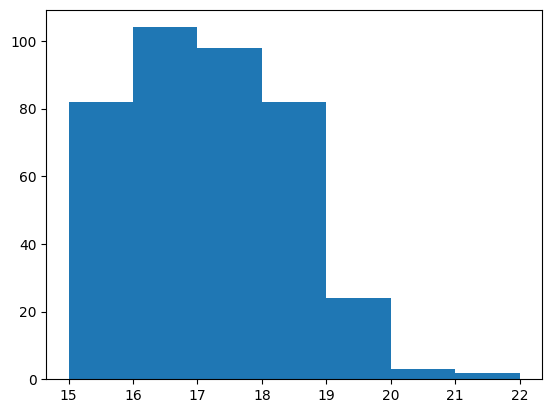

In [ ]:
plt.hist(df['age'], bins = 7)

Considerando os dados acima, e as indormações obtidas em df.describe() suspeitamos que pelo menos 75%(q3) desses alunos possuem até 18 anos, ou seja:

H0: P( X <= 18) => q3  vs  H1: P( X <= 18) < q3

Considerando um nível de significância de α = 5%, temos:

In [ ]:
# Estatísticas de teste
T1 = df[df['age'] <= 18]
T2 = df[df['age'] < 18]

print('T1:', len(T1))
print('T2:', len(T2))

T1: 366
T2: 284


In [ ]:
binom_test( 366, 395, 0.75, alternative='smaller')

1.0

In [ ]:
# Com correção

T1_corrigido = len(T1) + 0.5

# Realizando o teste equivalente ao binomial para grandes amostras
stat_corrected, p_valor = proportions_ztest(T1_corrigido, n, 0.75, alternative='smaller')

# Print the corrected results
print(f"Estatística de teste corrigida: {stat_corrected}, valor-p: {p_valor}")

Estatística de teste corrigida: 13.66109328388883, valor-p: 1.0


**Observação:** em R

prop.test( 366, 395, 0.75, alternative='less', correct = T)

	1-sample proportions test with continuity correction

data:  366 out of 395, null probability 0.75

X-squared = 64.75, df = 1, p-value = 1

alternative hypothesis: true p is less than 0.75

95 percent confidence interval:

 0.0000000 0.9464758

sample estimates:

        p
        
0.9265823

Como o valor-p > α, tomamos a decisão de não rejeitar H0.

**Conclusão:** ao nível de significância α = 5%, a análise dos dados coletados nos fornece evidências de que ao menos 75% dos estudantes que realizaram os exames de matemática possuem no máximo 18 anos.

# **Testes para distribuições populacionais**

Como os dados anteriores não aparentam ser modelados por nenhuma distribuição conhecida, vamos observar uma outra base com dados de assunto correlato

In [ ]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
# Verificando a existência de componentes NaN
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Observando a presença de duplicações
df.duplicated().sum()

0

In [ ]:
# Observando outra característica bastante utilizada quando não há dados
df.applymap(lambda x: x == '?').sum()

<ipython-input-21-abd9e385573b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x == '?').sum()


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Como as variáveis inconsistentes não são de interesse para a testagem, podemos apenas ignorá-las

A seguir teremos o interesse em conhecer características da distribuição das variáveis

**Physical_Activity:** número de horas de atividades físicas praticadas pelos estudantes durante uma semana(valores inteiros).

**Sleep_Hours:** número de horas dormidas pelos estudantes por noite.

# **Teste qui-quadrado**

Como, neste caso, Physical_Activity é uma variável discreta, podemos testar se é proveniente de uma binomial simétrica(com p = 0.5) e n = 6, ou seja:

H0: os dados para o tempo dedicado a atividades físicas são provenientes de uma população com distribuição binomial com parâmetros n = 6 e p = 0.5

H1: Os dados não são provenientes de uma binomial com n = 6 e p = 0.5

Considerando um nível de significância de α = 5%, temos:

(array([  46.,  421., 1627., 2545., 1575.,  361.,   32.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

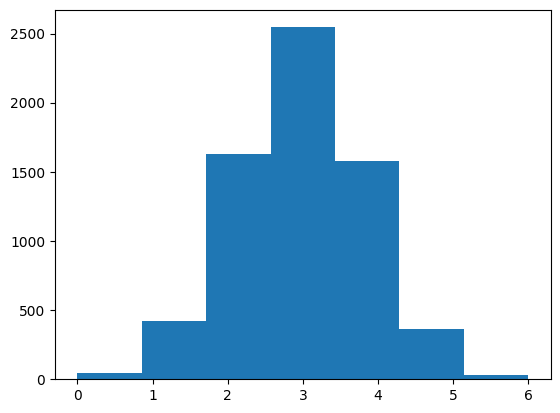

In [ ]:
plt.hist(df['Physical_Activity'], bins = 7)

In [ ]:
# Parâmetros de interesse
n = 6  # máximo valor possível
p = 0.5  # Probabilidade de sucesso

# Obtendo as frequências observadas e esperadas
observadas = [ 46, 421, 1627, 2545, 1575, 361, 32]
esperadas = [len(df)*binom.pmf(k, n, p) for k in range(0, n+1)]

# Executando um teste qui-quadrado
chi2_stat, p_value = chisquare(f_obs=observadas, f_exp=esperadas)

# Resultados
print(f"Estatística de teste: {chi2_stat}")
print(f"valor-p: {p_value}")

Estatística de teste: 368.4076585439699
valor-p: 1.7201883068040395e-76


Como o valor-p < α, tomamos a decisão de rejeitar H0.

**Conclusão:** ao nível de significância α = 5%, a análise dos dados coletados nos fornece evidências de que o tempo dedicado a atividades físicas não pode ser explicado por uma distribuição binomial com n = 6 e p = 0.5.

Devido à elevada simetria, podemos aproximar os dados, com base em uma aproximação para grandes amostras, por uma distribuição normal e testar sua adequabilidade

In [ ]:
df['Physical_Activity'].mean()

2.9676101104888755

In [ ]:
df['Physical_Activity'].var()

1.0634375664009414

Vamos testar, agora, se os dados podem ser considerados como provenientes de uma distribuição normal com média 3 e variância 1.06:

H0: os dados para o tempo dedicado a atividades físicas são provenientes de uma população com distribuição normal com média 3 e variância 1.06

H1: Os dados não são provenientes de uma normal com média 3 e variância 1.06

Considerando um nível de significância de α = 5%, temos:

In [ ]:
# Parâmetros para a distribuição normal
media = 3  # média
desvio_padrao = np.sqrt(1.06)  # desvio padrão

# Frequências observadas
observadas = [46, 421, 1627, 2545, 1575, 361, 32]

# Calculando as probabilidades esperadas usando a distribuição normal
total_observado = sum(observadas)
esperadas_raw = [norm.pdf(k, loc=media, scale=desvio_padrao) for k in range(0, len(observadas))]
total_esperado = sum(esperadas_raw)

# Ajuste das frequências esperadas para que a soma corresponda às frequências observadas
esperadas = [total_observado * (e / total_esperado) for e in esperadas_raw]

# Executando o teste qui-quadrado
chi2_stat, valor_p = chisquare(f_obs=observadas, f_exp=esperadas)

# Exibir os resultados
print(f"Estatística de teste: {chi2_stat}")
print(f"valor-p: {valor_p}")

Estatística de teste: 8.594492227990973
valor-p: 0.19770039645415566


Como o valor-p > α, tomamos a decisão de não rejeitar H0.

**Conclusão:** ao nível de significância α = 5%, a análise dos dados coletados nos fornece evidências de que o tempo dedicado a atividades físicas provém de uma população com distribuição normal de média 3 e variância 1.06.

# **Teste Kolmogorov-Smirnov**

Utilizando a mesma distribuição do caso anterior, temos:

In [ ]:
# Executando um teste KS
ks_statistic, valor_p = kstest(df['Physical_Activity'], 'binom', args= (6, 0.5))

# Resultados
print(f'Estatística de teste: {ks_statistic}')
print(f'p-valor: {valor_p}')

Estatística de teste: 0.3393134175874073
p-valor: 0.0


Como o valor-p < α, tomamos a decisão de rejeitar H0.

**Conclusão:** ao nível de significância α = 5%, a análise dos dados coletados nos fornece evidências de que o tempo dedicado a atividades físicas não pode ser explicado por uma distribuição binomial com n = 6 e p = 0.5.

Agora, para o caso normal com média e variância conhecidos

In [ ]:
# Executando um teste KS
ks_statistic, valor_p = kstest(df['Physical_Activity'], 'norm', args= (media, desvio_padrao))

# Resultados
print(f'Estatística de teste: {ks_statistic}')
print(f'p-valor: {valor_p}')

Estatística de teste: 0.20213410019676104
p-valor: 3.957745967359743e-237


Como o valor-p < α, tomamos a decisão de rejeitar H0.

Conclusão: ao nível de significância α = 5%, a análise dos dados coletados nos fornece evidências de que o tempo dedicado a atividades físicas não provém de distribuição normal de média 3 e variância 1.06.

**Observação:** o teste Kolmogorov-Smirnov não é indicado para testar variáveis discretas devido à grande quantidade de empates, o que o torna menos poderoso que o qui-quadrado nesses casos.

# **Teste Lilliefors**

(array([ 309.,  695., 1376., 1741., 1399.,  775.,  312.]),
 array([ 4.        ,  4.85714286,  5.71428571,  6.57142857,  7.42857143,
         8.28571429,  9.14285714, 10.        ]),
 <BarContainer object of 7 artists>)

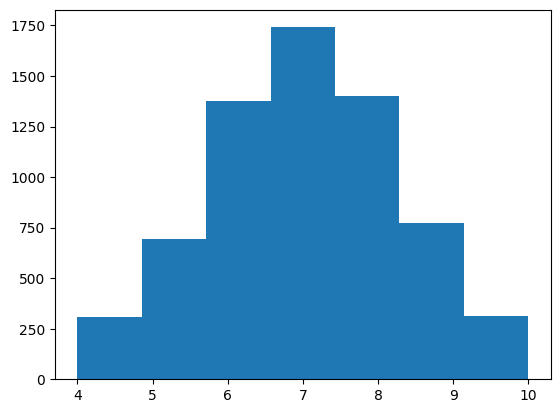

In [ ]:
plt.hist(df['Sleep_Hours'], bins = 7)

Analisando-se o gráfico de frequências, temos uma forte impressão de que a quantidade de horas de sono segue uma distribuição simétrica, que poderia ser suposta normal com base na aproximação para grandes amostras.

Ao nível de significância α = 5%, queremos testar se essa afirmação é verdadeira, isto é:

H0: os dados para a quantidade de horas de sono são provenientes de uma distribuição normal com média e variância desconhecidas

vs

H1: os dados para a quantidade de horas de sono não são provenientes de uma distribuição normal

In [ ]:
# Realizando um teste Lilliefors
estatística, valor_p = sm.stats.lilliefors(df['Sleep_Hours'])

print(f"Estatística de teste: {estatística}")
print(f"p-valor: {valor_p}")

Estatística de teste: 0.13187981576336105
p-valor: 0.0009999999999998899


Como o valor-p < α, optamos por rejeitar H0.

**Conclusão:** ao nível de significância α = 5%, os dados coletados nos fornecem evidências de que a quantidade de horas de sono não é proveniente de uma população com distribuição normal.

# **Teste de Shapiro-Wilk**

Vamos considerar a mesma situação e o mesmo conjunto de dados utilizados para o teste anterior, assim tem-se:

In [ ]:
# Realizando o teste de Shapiro-Wilk
estatística, valor_p = stats.shapiro(df['Sleep_Hours'])

print(f"Estatística de teste: {estatística}")
print(f"p-valor: {valor_p}")

Estatística de teste: 0.9528957608286093
p-valor: 9.666331494783787e-42


Assim, temos que o teste de Shapiro-Wilk também rejeitou a normalidade, dado que valor-p < α.

**Conclusão:** ao nível de significância α = 5%, a análise dos dados coletados nos fornece evidências de que a quantidade de horas de sono não é advinda de uma população com distribuição normal.